In [5]:
import xml.etree.ElementTree as ET
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [15]:
def sameTable(ymin_1, ymin_2, ymax_1, ymax_2):
    min_diff = abs(ymin_1 - ymin_2)
    max_diff = abs(ymax_1 - ymax_2)

    if min_diff <= 5 and max_diff <=5:
        return True
    elif min_diff <= 4 and max_diff <=7:
        return True
    elif min_diff <= 7 and max_diff <=4:
        return True
    return False



In [74]:
if __name__ == "__main__":
    directory = '/home/vimal/Downloads/Marmot/marmot/'
    final_col_directory = '/home/vimal/Downloads/Marmot/column_mask/'
    final_table_directory = '/home/vimal/Downloads/Marmot/table_mask/'

    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        # Find all the xml files
        if filename.endswith(".xml"):
            filename = filename[:-4]

            # Parse xml file
            tree = ET.parse('/home/vimal/Documents/marmot_data/marmot/' + filename + '.xml')
            root = tree.getroot()
            size = root.find('size')

            # Parse width
            width = int(size.find('width').text)
            height = int(size.find('height').text)

            # Create grayscale image array
            col_mask = np.zeros((height, width), dtype=np.int32)
            table_mask = np.zeros((height, width), dtype = np.int32)

            got_first_column = False
            i=0
            table_xmin = 10000
            table_xmax = 0

            table_ymin = 10000
            table_ymax = 0

            for column in root.findall('object'):
                bndbox = column.find('bndbox')
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)

                col_mask[ymin:ymax, xmin:xmax] = 255
                                
                if got_first_column:
                    if sameTable(prev_ymin, ymin, prev_ymax, ymax) == False:
                        i+=1
                        got_first_column = False
                        table_mask[table_ymin:table_ymax, table_xmin:table_xmax] = 255
                        
                        table_xmin = 10000
                        table_xmax = 0

                        table_ymin = 10000
                        table_ymax = 0
                        
                if got_first_column == False:
                    got_first_column = True
                    first_xmin = xmin
                    
                prev_ymin = ymin
                prev_ymax = ymax
                
                table_xmin = min(xmin, table_xmin)
                table_xmax = max(xmax, table_xmax)
                
                table_ymin = min(ymin, table_ymin)
                table_ymax = max(ymax, table_ymax)

            table_mask[table_ymin:table_ymax, table_xmin:table_xmax] = 255

            im = Image.fromarray(col_mask.astype(np.uint8),'L')
            im.save(final_col_directory + filename + ".jpeg")

            im = Image.fromarray(table_mask.astype(np.uint8),'L')
            im.save(final_table_directory + filename + ".jpeg")

In [1]:
import xml.etree.ElementTree as ET
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
#import tensorflow as tf

In [2]:
def sameTable(ymin_1, ymin_2, ymax_1, ymax_2):
    min_diff = abs(ymin_1 - ymin_2)
    max_diff = abs(ymax_1 - ymax_2)

    if min_diff <= 5 and max_diff <=5:
        return True
    elif min_diff <= 4 and max_diff <=7:
        return True
    elif min_diff <= 7 and max_diff <=4:
        return True
    return False



In [138]:
if __name__ == "__main__":
    directory = '/home/vimal/Documents/mask/3/sample_3/'
    final_col_directory = '/home/vimal/Documents/mask/3/column_mask/'
    final_table_directory = '/home/vimal/Documents/mask/3/table_mask/'

    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        # Find all the xml files
        if filename.endswith(".xml"):
            filename = filename[:-4]

            # Parse xml file
            tree = ET.parse('/home/vimal/Documents/mask/3/sample_3/' + filename + '.xml')
            root = tree.getroot()
            size = root.find('size')

            # Parse width
            width = int(size.find('width').text)
            height = int(size.find('height').text)

            # Create grayscale image array
            col_mask = np.zeros((height, width), dtype=np.int32)
            table_mask = np.zeros((height, width), dtype = np.int32)

            got_first_column = False
            i=0
            table_xmin = 10000
            table_xmax = 0

            table_ymin = 10000
            table_ymax = 0

            for column in root.findall('object'):
                bndbox = column.find('bndbox')
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)

                col_mask[ymin:ymax, xmin:xmax] = 255
                                
                if got_first_column:
                    if sameTable(prev_ymin, ymin, prev_ymax, ymax) == False:
                        i+=1
                        got_first_column = False
                        table_mask[table_ymin:table_ymax, table_xmin:table_xmax] = 255
                        
                        table_xmin = 10000
                        table_xmax = 0

                        table_ymin = 10000
                        table_ymax = 0
                        
                if got_first_column == False:
                    got_first_column = True
                    first_xmin = xmin
                    
                prev_ymin = ymin
                prev_ymax = ymax
                
                table_xmin = min(xmin, table_xmin)
                table_xmax = max(xmax, table_xmax)
                
                table_ymin = min(ymin, table_ymin)
                table_ymax = max(ymax, table_ymax)

            table_mask[table_ymin:table_ymax, table_xmin:table_xmax] = 255
            
            im = Image.fromarray(col_mask.astype(np.uint8),'L')
            im.save(final_col_directory + filename + ".jpeg")

            im = Image.fromarray(table_mask.astype(np.uint8),'L')
            im.save(final_table_directory + filename + ".jpeg")

Text(0.5, 1.0, 'column_mask')

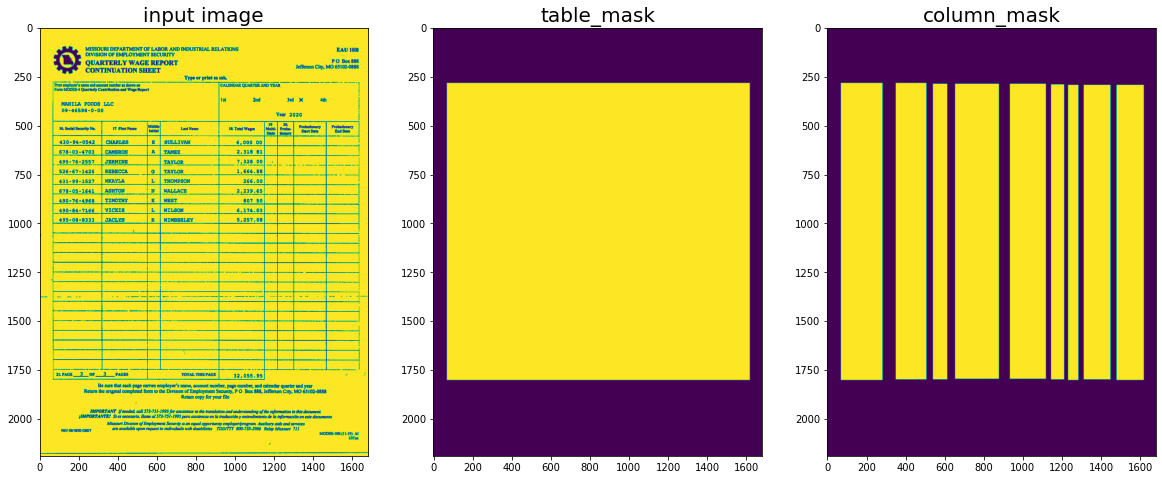

In [139]:
input = '/home/vimal/Documents/mask/3/sample_3/0946598000.jpeg'
table_mask = '/home/vimal/Documents/mask/3/table_mask/0946598000.jpeg'
column_mask = '/home/vimal/Documents/mask/3/column_mask/0946598000.jpeg'


im = Image.open(input) 
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


In [129]:
if __name__ == "__main__":
    directory = '/home/vimal/Documents/mask/samples/'
    final_col_directory = '/home/vimal/Documents/mask/4th page/column_mask/'
    final_table_directory = '/home/vimal/Documents/mask/4th page/table_mask/'

    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        # Find all the xml files
        if filename.endswith(".xml"):
            filename = filename[:-4]

            # Parse xml file
            tree = ET.parse('/home/vimal/Documents/mask/samples/' + filename + '.xml')
            root = tree.getroot()
            size = root.find('size')

            # Parse width
            width = int(size.find('width').text)
            height = int(size.find('height').text)

            # Create grayscale image array
            col_mask = np.zeros((height, width), dtype=np.int32)
            table_mask = np.zeros((height, width), dtype = np.int32)

            got_first_column = False
            i=0
            table_xmin = 10000
            table_xmax = 0

            table_ymin = 10000
            table_ymax = 0

            for column in root.findall('object'):
                bndbox = column.find('bndbox')
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)

                col_mask[ymin:ymax, xmin:xmax] = 255
                                
                if got_first_column:
                    if sameTable(prev_ymin, ymin, prev_ymax, ymax) == False:
                        i+=1
                        got_first_column = False
                        table_mask[table_ymin:table_ymax, table_xmin:table_xmax] = 255
                        
                        table_xmin = 10000
                        table_xmax = 0

                        table_ymin = 10000
                        table_ymax = 0
                        
                if got_first_column == False:
                    got_first_column = True
                    first_xmin = xmin
                    
                prev_ymin = ymin
                prev_ymax = ymax
                
                table_xmin = min(xmin, table_xmin)
                table_xmax = max(xmax, table_xmax)
                
                table_ymin = min(ymin, table_ymin)
                table_ymax = max(ymax, table_ymax)

            table_mask[table_ymin:table_ymax, table_xmin:table_xmax] = 255
            
            im = Image.fromarray(col_mask.astype(np.uint8),'L')
            im.save(final_col_directory + filename + ".jpeg")

            im = Image.fromarray(table_mask.astype(np.uint8),'L')
            im.save(final_table_directory + filename + ".jpeg")

Text(0.5, 1.0, 'column_mask')

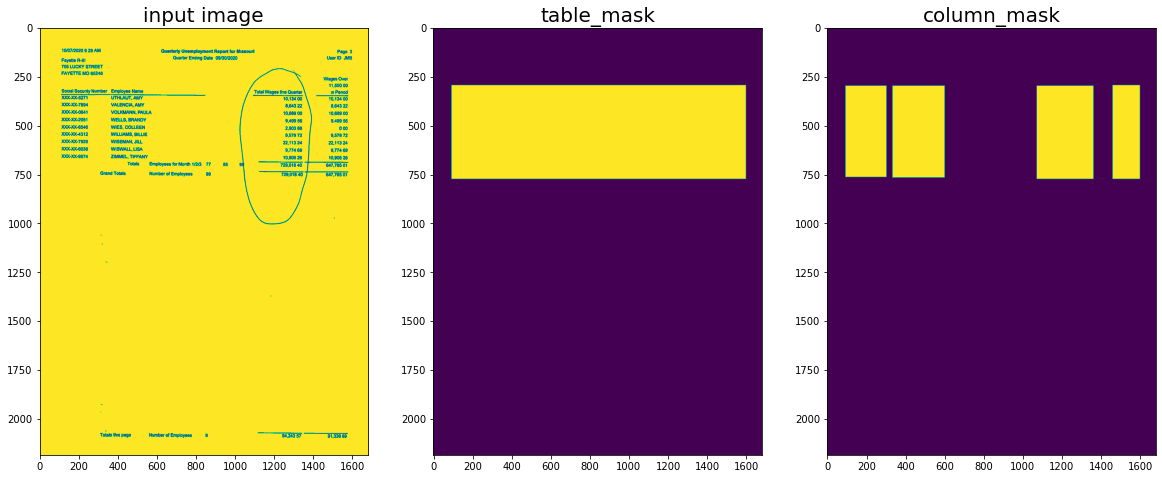

In [130]:
input = '/home/vimal/Documents/mask/samples/0824112000.jpeg'
table_mask = '/home/vimal/Documents/mask/4th page/table_mask/0824112000.jpeg'
column_mask = '/home/vimal/Documents/mask/4th page/column_mask/0824112000.jpeg'


im = Image.open(input) 
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


In [ ]:
0104702000

Text(0.5, 1.0, 'column_mask')

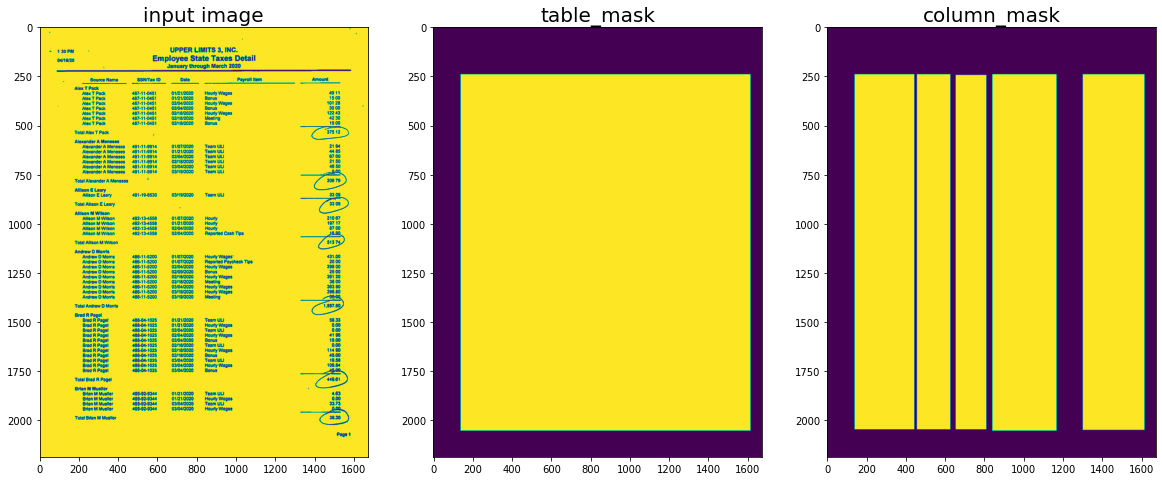

In [4]:
input = '/home/vimal/Documents/mask/1st_page/samples/0454466000.jpeg'
table_mask = '/home/vimal/Documents/mask/1st_page/table_mask/0454466000.jpeg'
column_mask = '/home/vimal/Documents/mask/1st_page/column_mask/0454466000.jpeg'


im = Image.open(input) 
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


Text(0.5, 1.0, 'column_mask')

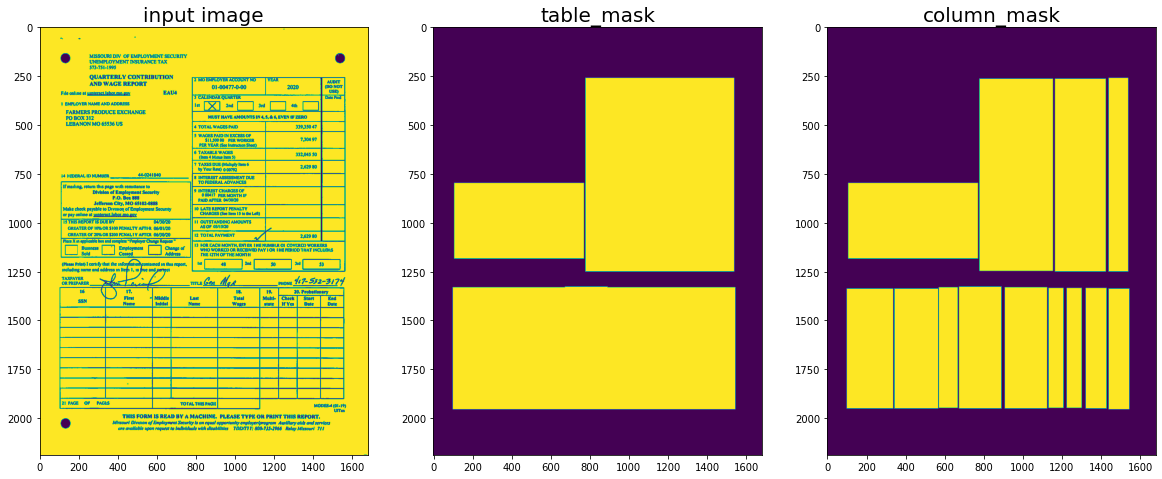

In [3]:
input = '/home/vimal/Documents/mask/xml files/0100477000.jpeg'
table_mask = '/home/vimal/Documents/mask/table_mask/0100477000.jpeg'
column_mask = '/home/vimal/Documents/mask/column_mask/0100477000.jpeg'


im = Image.open(input) 
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


Text(0.5, 1.0, 'column_mask')

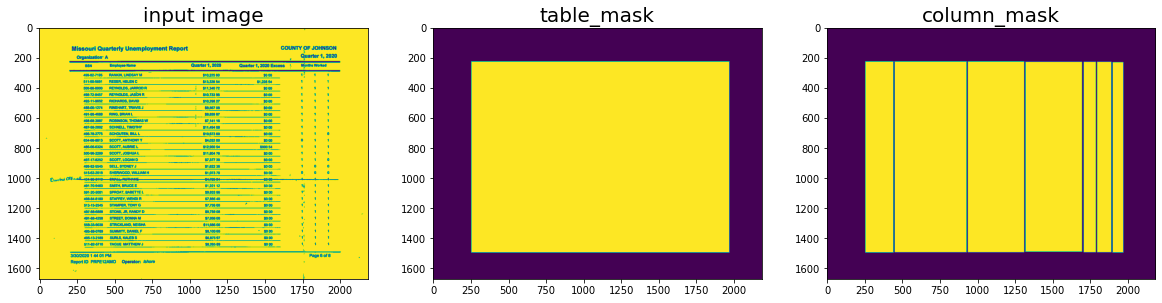

In [4]:
input = '/home/vimal/Documents/mask/xml files/0379414000.jpeg'
table_mask = '/home/vimal/Documents/mask/table_mask/0379414000.jpeg'
column_mask = '/home/vimal/Documents/mask/column_mask/0379414000.jpeg'


im = Image.open(input) 
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


Text(0.5, 1.0, 'column_mask')

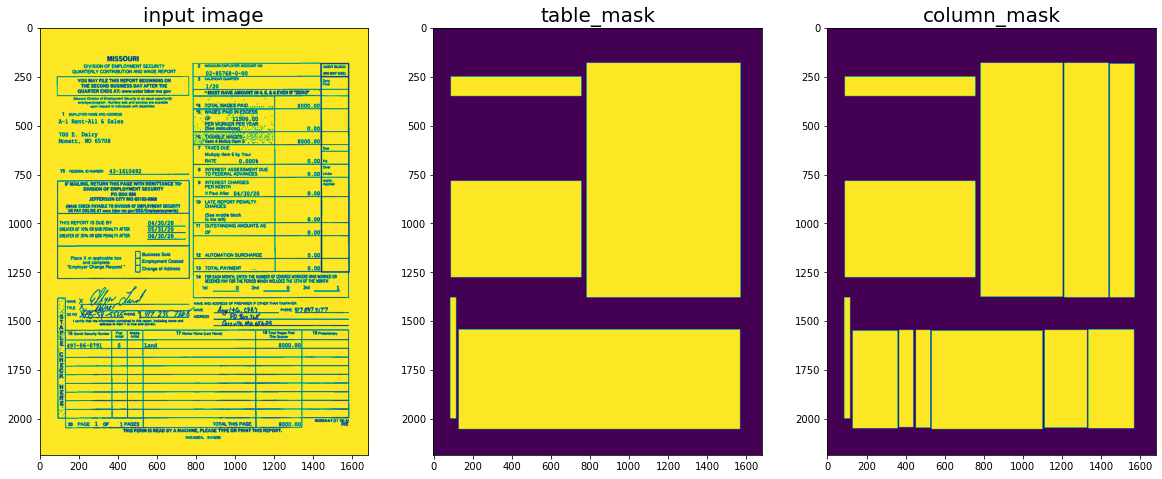

In [5]:
input = '/home/vimal/Documents/mask/xml files/0285768000.jpeg'
table_mask = '/home/vimal/Documents/mask/table_mask/0285768000.jpeg'
column_mask = '/home/vimal/Documents/mask/column_mask/0285768000.jpeg'


im = Image.open(input) 
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


Text(0.5, 1.0, 'column_mask')

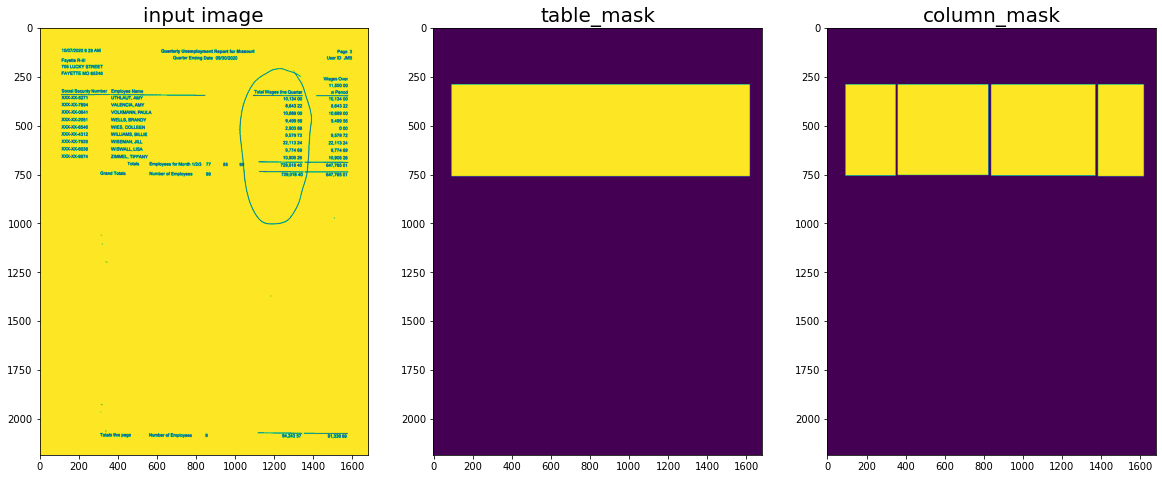

In [6]:
input = '/home/vimal/Documents/mask/xml files/0824112000.jpeg'
table_mask = '/home/vimal/Documents/mask/table_mask/0824112000.jpeg'
column_mask = '/home/vimal/Documents/mask/column_mask/0824112000.jpeg'

import cv2
im = Image.open(input)
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


Text(0.5, 1.0, 'column_mask')

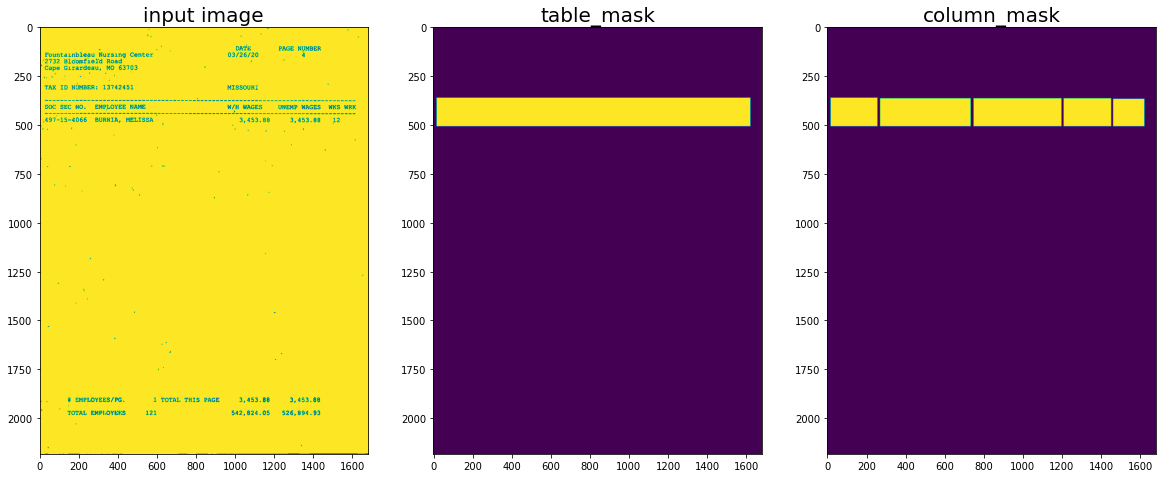

In [7]:
input = '/home/vimal/Documents/mask/xml files/0114588000.jpeg'
table_mask = '/home/vimal/Documents/mask/table_mask/0114588000.jpeg'
column_mask = '/home/vimal/Documents/mask/column_mask/0114588000.jpeg'

import cv2
im = Image.open(input)
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


Text(0.5, 1.0, 'column_mask')

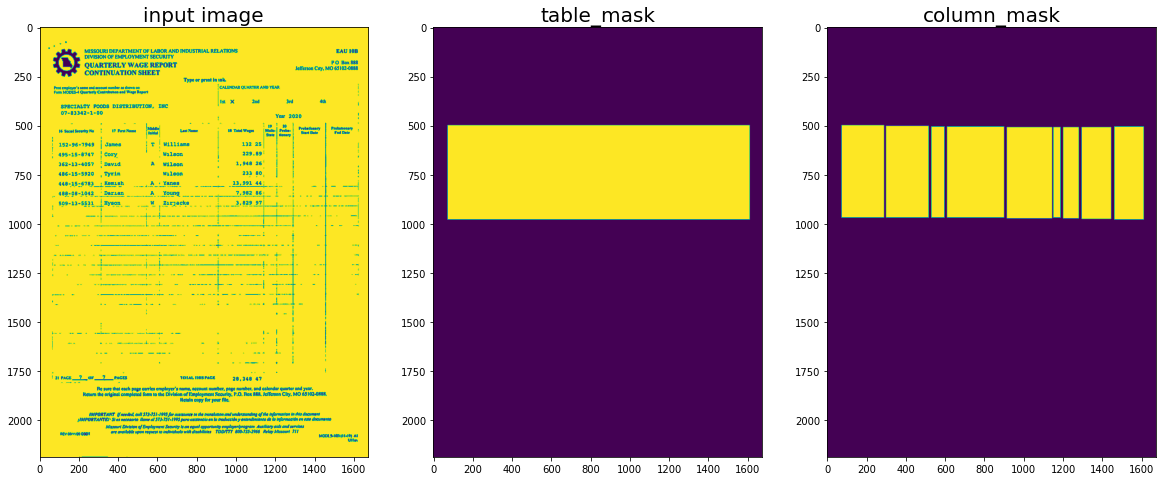

In [8]:
input = '/home/vimal/Documents/mask/xml files/0783342000.jpeg'
table_mask = '/home/vimal/Documents/mask/table_mask/0783342000.jpeg'
column_mask = '/home/vimal/Documents/mask/column_mask/0783342000.jpeg'

import cv2
im = Image.open(input)
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


Text(0.5, 1.0, 'column_mask')

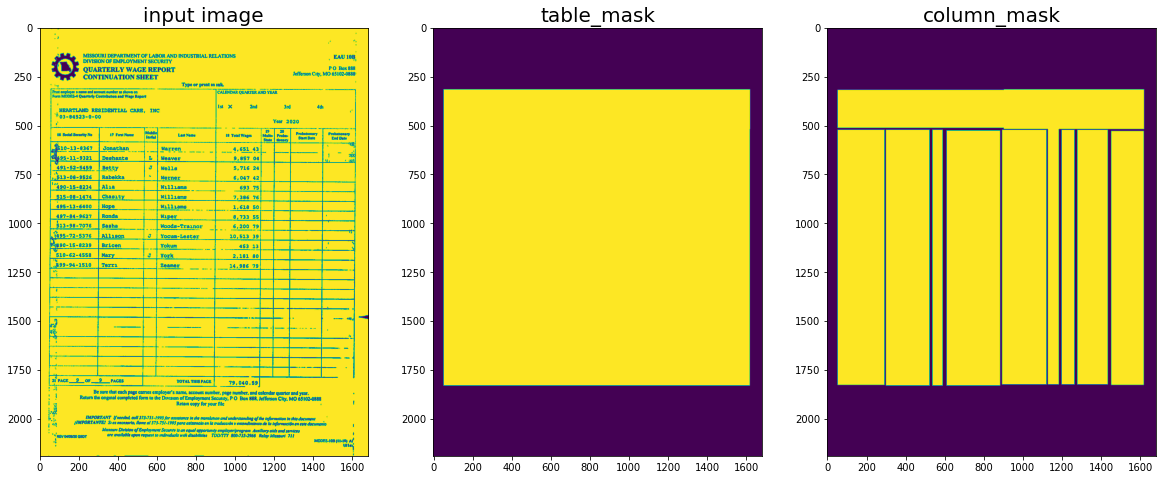

In [9]:
input = '/home/vimal/Documents/mask/xml files/0384523000.jpeg'
table_mask = '/home/vimal/Documents/mask/table_mask/0384523000.jpeg'
column_mask = '/home/vimal/Documents/mask/column_mask/0384523000.jpeg'

import cv2
im = Image.open(input)
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


Text(0.5, 1.0, 'column_mask')

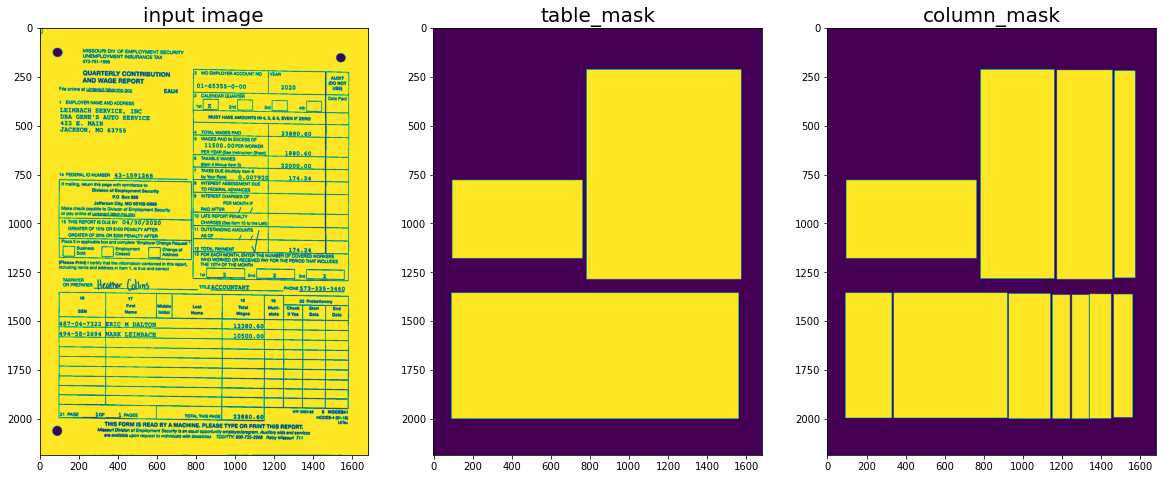

In [15]:
input = '/home/vimal/Documents/mask/xml files/0165355000.jpeg'
table_mask = '/home/vimal/Documents/mask/table_mask/0165355000.jpeg'
column_mask = '/home/vimal/Documents/mask/column_mask/0165355000.jpeg'

import cv2
im = Image.open(input)
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


In [3]:
for i in os.listdir('/home/vimal/Downloads/Marmot/table_mask'):
    print(i)

10.1.1.120.1514_6.jpeg
10.1.1.192.1811_16.jpeg
10.1.1.6.2312_5.jpeg
10.1.1.12.797_3.jpeg
10.1.1.30.3555_10.jpeg
10.1.1.36.218_12.jpeg
10.1.1.160.577_5.jpeg
10.1.1.6.2249_15.jpeg
10.1.1.6.2327_7.jpeg
10.1.1.1.2100_12.jpeg
10.1.1.8.2161_9.jpeg
10.1.1.6.2199_6.jpeg
10.1.1.6.2314_5.jpeg
10.1.1.185.1560_13.jpeg
10.1.1.160.653_12.jpeg
10.1.1.6.2374_6.jpeg
10.1.1.160.628_2.jpeg
10.1.1.8.2131_13.jpeg
10.1.1.7.2158_6.jpeg
10.1.1.1.2111_6.jpeg
10.1.1.1.2129_6.jpeg
10.1.1.1.2089_3.jpeg
10.1.1.120.1504_11.jpeg
10.1.1.1.2023_31.jpeg
10.1.1.160.661_7.jpeg
10.1.1.100.302_10.jpeg
10.1.1.160.690_35.jpeg
10.1.1.1.2018_4.jpeg
10.1.1.1.2023_33.jpeg
10.1.1.6.2280_13.jpeg
10.1.1.1.2047_14.jpeg
10.1.1.1.2111_7.jpeg
10.1.1.1.2051_5.jpeg
10.1.1.6.2277_10.jpeg
10.1.1.10.2226_5.jpeg
10.1.1.1.2076_85.jpeg
10.1.1.185.1552_1.jpeg
10.1.1.7.2186_34.jpeg
10.1.1.178.3002_12.jpeg
10.1.1.34.330_9.jpeg
10.1.1.6.2197_3.jpeg
10.1.1.1.2112_4.jpeg
10.1.1.186.1550_5.jpeg
10.1.1.38.2480_4.jpeg
10.1.1.160.552_18.jpeg
10.1.1.100.

Text(0.5, 1.0, 'column_mask')

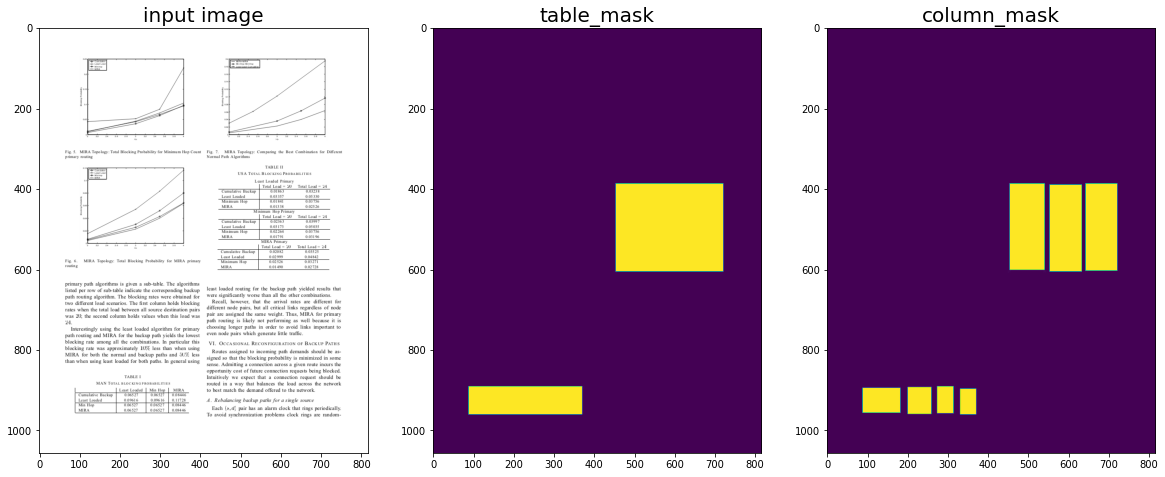

In [6]:
input = '/home/vimal/Downloads/Marmot/marmot/10.1.1.7.2158_6.bmp'
table_mask = '/home/vimal/Downloads/Marmot/table_mask/10.1.1.7.2158_6.jpeg'
column_mask = '/home/vimal/Downloads/Marmot/column_mask/10.1.1.7.2158_6.jpeg'


im = Image.open(input) 
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


Text(0.5, 1.0, 'column_mask')

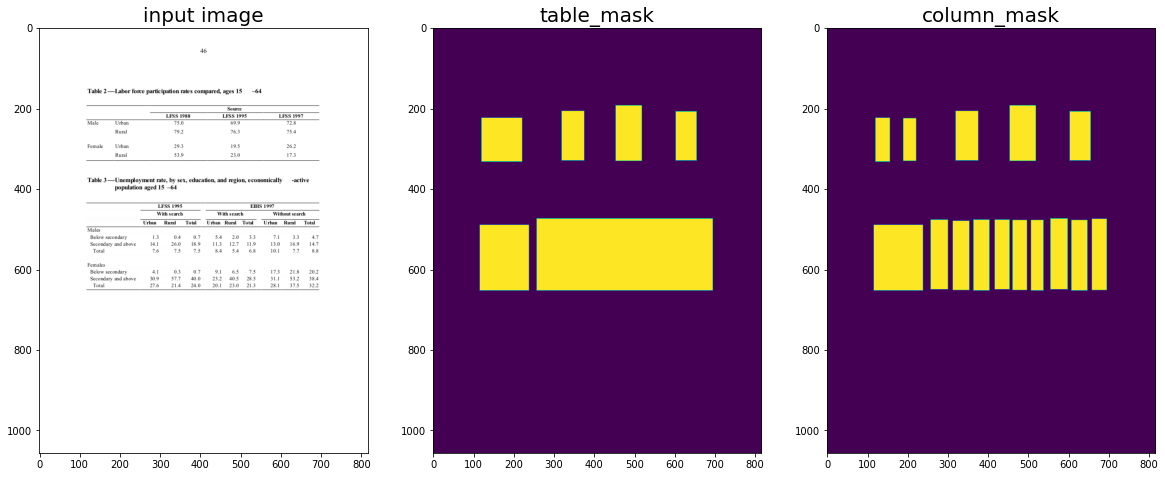

In [34]:
input = '/home/vimal/Downloads/Marmot/marmot/10.1.1.1.2013_64.bmp'
table_mask = '/home/vimal/Downloads/Marmot/table_mask/10.1.1.1.2013_64.jpeg'
column_mask = '/home/vimal/Downloads/Marmot/column_mask/10.1.1.1.2013_64.jpeg'


im = Image.open(input) 
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


Text(0.5, 1.0, 'column_mask')

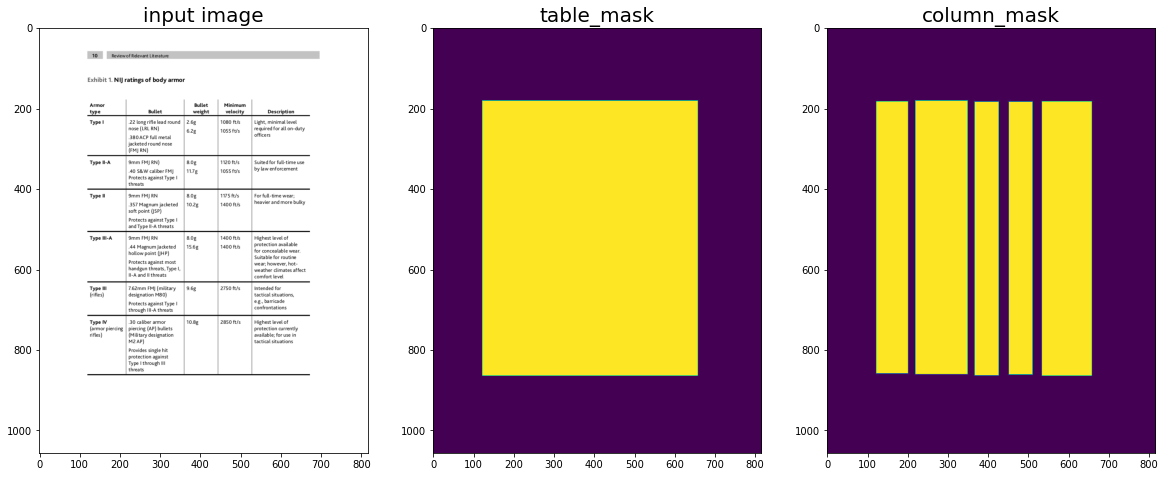

In [8]:
input = '/home/vimal/Downloads/Marmot/marmot/10.1.1.160.615_15.bmp'
table_mask = '/home/vimal/Downloads/Marmot/table_mask/10.1.1.160.615_15.jpeg'
column_mask = '/home/vimal/Downloads/Marmot/column_mask/10.1.1.160.615_15.jpeg'


im = Image.open(input) 
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


Text(0.5, 1.0, 'column_mask')

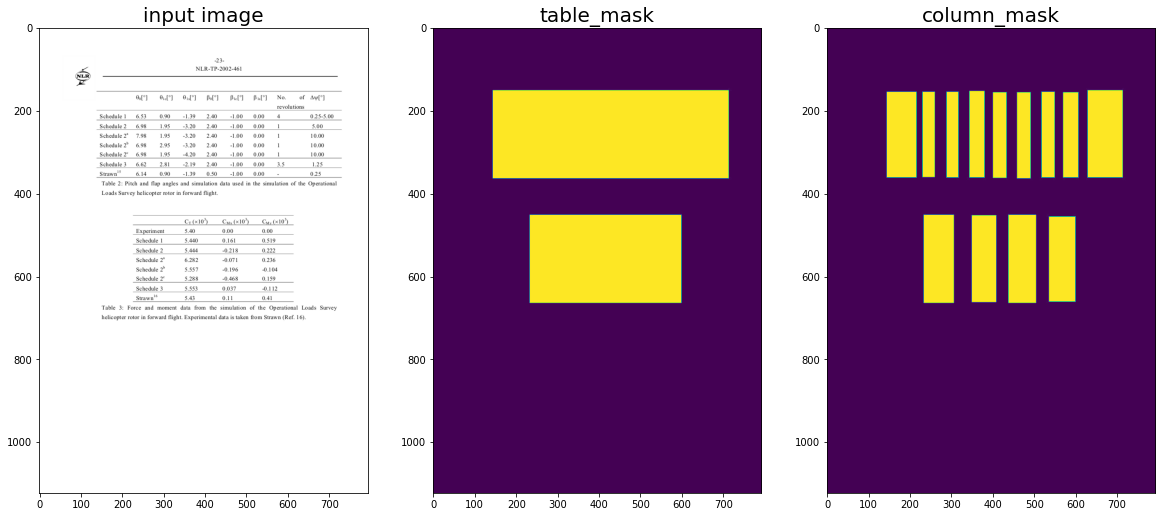

In [9]:
input = '/home/vimal/Downloads/Marmot/marmot/10.1.1.160.538_23.bmp'
table_mask = '/home/vimal/Downloads/Marmot/table_mask/10.1.1.160.538_23.jpeg'
column_mask = '/home/vimal/Downloads/Marmot/column_mask/10.1.1.160.538_23.jpeg'


im = Image.open(input) 
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


In [1]:
pip install labelImg 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip freeze

absl-py==0.12.0
argon2-cffi==20.1.0
astunparse==1.6.3
async-generator==1.10
attrs==20.3.0
backcall==0.2.0
bleach==3.3.0
cachetools==4.2.1
camelot-py==0.8.2
certifi==2020.12.5
cffi==1.14.5
chardet==4.0.0
click==7.1.2
cryptography==3.4.7
cycler==0.10.0
Cython==0.29.22
decorator==4.4.2
defusedxml==0.7.1
distro==1.5.0
entrypoints==0.3
et-xmlfile==1.0.1
flatbuffers==1.12
fvcore==0.1.1.post20200623
gast==0.3.3
google-api-core==1.26.3
google-auth==1.28.0
google-auth-oauthlib==0.4.3
google-cloud==0.34.0
google-cloud-vision==2.2.0
google-pasta==0.2.0
googleapis-common-protos==1.53.0
grpcio==1.32.0
h5py==2.10.0
idna==2.10
ipykernel==5.5.0
ipython==7.21.0
ipython-genutils==0.2.0
ipywidgets==7.6.3
jedi==0.18.0
Jinja2==2.11.3
jsonschema==3.2.0
jupyter==1.0.0
jupyter-client==6.1.12
jupyter-console==6.4.0
jupyter-core==4.7.1
jupyterlab-pygments==0.1.2
jupyterlab-widgets==1.0.0
Keras-Preprocessing==1.1.2
kiwisolver==1.3.1
labelImg==1.8.5
layoutparser==0.1.3
libcst==0.3.18
lxml==4.6.3
Markdown==3.3.4
M

In [147]:
from PIL import Image 
from PIL import ImageFilter 
import os 
  
def main(): 
    # path of the folder containing the raw images 
    inPath ="/home/vimal/Documents/mask/3/table_mask"
  
    # path of the folder that will contain the modified image 
    outPath ="/home/vimal/Documents/mask/overall/table_mask"
  
    for imagePath in os.listdir(inPath): 
        # imagePath contains name of the image  
        inputPath = os.path.join(inPath, imagePath) 
  
        # inputPath contains the full directory name 
        img = Image.open(inputPath) 
        img.seek(0)
        newpath = os.path.splitext(imagePath)[0] + '.jpeg' 
        fullOutPath = os.path.join(outPath, '3p_'+newpath) 
        img.save(fullOutPath) 
        print(fullOutPath) 
  
# Driver Function 
if __name__ == '__main__':
    main()

/home/vimal/Documents/mask/overall/table_mask/3p_0273443000.jpeg
/home/vimal/Documents/mask/overall/table_mask/3p_0454466000.jpeg
/home/vimal/Documents/mask/overall/table_mask/3p_0183112000.jpeg
/home/vimal/Documents/mask/overall/table_mask/3p_0383963000.jpeg
/home/vimal/Documents/mask/overall/table_mask/3p_0103574000.jpeg
/home/vimal/Documents/mask/overall/table_mask/3p_0110276000.jpeg
/home/vimal/Documents/mask/overall/table_mask/3p_0223262000.jpeg
/home/vimal/Documents/mask/overall/table_mask/3p_0452990000.jpeg
/home/vimal/Documents/mask/overall/table_mask/3p_0591728000.jpeg
/home/vimal/Documents/mask/overall/table_mask/3p_0252604000.jpeg
/home/vimal/Documents/mask/overall/table_mask/3p_0357004000.jpeg
/home/vimal/Documents/mask/overall/table_mask/3p_0327949000.jpeg
/home/vimal/Documents/mask/overall/table_mask/3p_0410944000.jpeg
/home/vimal/Documents/mask/overall/table_mask/3p_0435336000.jpeg
/home/vimal/Documents/mask/overall/table_mask/3p_0112532000.jpeg
/home/vimal/Documents/mas

In [146]:
from PIL import Image 
from PIL import ImageFilter 
import os 
  
def main(): 
    # path of the folder containing the raw images 
    inPath ="/home/vimal/Documents/mask/3/column_mask"
  
    # path of the folder that will contain the modified image 
    outPath ="/home/vimal/Documents/mask/overall/column_mask"
  
    for imagePath in os.listdir(inPath): 
        # imagePath contains name of the image  
        inputPath = os.path.join(inPath, imagePath) 
  
        # inputPath contains the full directory name 
        img = Image.open(inputPath) 
        img.seek(0)
        newpath = os.path.splitext(imagePath)[0] + '.jpeg' 
        fullOutPath = os.path.join(outPath, '3p_'+newpath) 
        img.save(fullOutPath) 
        print(fullOutPath) 
  
# Driver Function 
if __name__ == '__main__':
    main()

/home/vimal/Documents/mask/overall/column_mask/3p_0273443000.jpeg
/home/vimal/Documents/mask/overall/column_mask/3p_0454466000.jpeg
/home/vimal/Documents/mask/overall/column_mask/3p_0183112000.jpeg
/home/vimal/Documents/mask/overall/column_mask/3p_0383963000.jpeg
/home/vimal/Documents/mask/overall/column_mask/3p_0103574000.jpeg
/home/vimal/Documents/mask/overall/column_mask/3p_0110276000.jpeg
/home/vimal/Documents/mask/overall/column_mask/3p_0223262000.jpeg
/home/vimal/Documents/mask/overall/column_mask/3p_0452990000.jpeg
/home/vimal/Documents/mask/overall/column_mask/3p_0591728000.jpeg
/home/vimal/Documents/mask/overall/column_mask/3p_0252604000.jpeg
/home/vimal/Documents/mask/overall/column_mask/3p_0357004000.jpeg
/home/vimal/Documents/mask/overall/column_mask/3p_0327949000.jpeg
/home/vimal/Documents/mask/overall/column_mask/3p_0410944000.jpeg
/home/vimal/Documents/mask/overall/column_mask/3p_0435336000.jpeg
/home/vimal/Documents/mask/overall/column_mask/3p_0112532000.jpeg
/home/vima

In [144]:
from PIL import Image 
from PIL import ImageFilter 
import os 
  
def main(): 
    # path of the folder containing the raw images 
    inPath ="/home/vimal/Documents/mask/3/sample_3"
  
    # path of the folder that will contain the modified image 
    outPath ="/home/vimal/Documents/mask/overall/input"
  
    for imagePath in os.listdir(inPath): 
        # imagePath contains name of the image
        if imagePath.endswith(".jpeg"):
            inputPath = os.path.join(inPath, imagePath) 
            #inputPath contains the full directory name 
            img = Image.open(inputPath) 
            img.seek(0)
            newpath = os.path.splitext(imagePath)[0] + '.jpeg' 
            fullOutPath = os.path.join(outPath, '3p_'+newpath) 
            img.save(fullOutPath) 
            print(fullOutPath)
        
  
# Driver Function 
if __name__ == '__main__':
    main()

/home/vimal/Documents/mask/overall/input/3p_0273443000.jpeg
/home/vimal/Documents/mask/overall/input/3p_0454466000.jpeg
/home/vimal/Documents/mask/overall/input/3p_0183112000.jpeg
/home/vimal/Documents/mask/overall/input/3p_0383963000.jpeg
/home/vimal/Documents/mask/overall/input/3p_0103574000.jpeg
/home/vimal/Documents/mask/overall/input/3p_0110276000.jpeg
/home/vimal/Documents/mask/overall/input/3p_0223262000.jpeg
/home/vimal/Documents/mask/overall/input/3p_0452990000.jpeg
/home/vimal/Documents/mask/overall/input/3p_0591728000.jpeg
/home/vimal/Documents/mask/overall/input/3p_0252604000.jpeg
/home/vimal/Documents/mask/overall/input/3p_0357004000.jpeg
/home/vimal/Documents/mask/overall/input/3p_0327949000.jpeg
/home/vimal/Documents/mask/overall/input/3p_0410944000.jpeg
/home/vimal/Documents/mask/overall/input/3p_0435336000.jpeg
/home/vimal/Documents/mask/overall/input/3p_0112532000.jpeg
/home/vimal/Documents/mask/overall/input/3p_0103397000.jpeg
/home/vimal/Documents/mask/overall/input

In [145]:
from PIL import Image 
from PIL import ImageFilter 
import os 
import xml.etree.ElementTree as ET

  
def main(): 
    # path of the folder containing the raw images 
    inPath ="/home/vimal/Documents/mask/3/sample_3"
  
    # path of the folder that will contain the modified image 
    outPath ="/home/vimal/Documents/mask/overall/input"
  
    for imagePath in os.listdir(inPath): 
        # imagePath contains name of the image
        if imagePath.endswith(".xml"):
            inputPath = os.path.join(inPath, imagePath) 
            # inputPath contains the full directory name 
            #img = Image.open(inputPath)
            img = ET.parse(inputPath)

            #img.seek(0)
            newpath = os.path.splitext(imagePath)[0] + '.xml' 
            fullOutPath = os.path.join(outPath, '3p_'+newpath) 
            img.write(fullOutPath) 
            print(fullOutPath)
        
  
# Driver Function 
if __name__ == '__main__':
    main()

/home/vimal/Documents/mask/overall/input/3p_0357004000.xml
/home/vimal/Documents/mask/overall/input/3p_0223262000.xml
/home/vimal/Documents/mask/overall/input/3p_0112532000.xml
/home/vimal/Documents/mask/overall/input/3p_0103397000.xml
/home/vimal/Documents/mask/overall/input/3p_0454466000.xml
/home/vimal/Documents/mask/overall/input/3p_0435336000.xml
/home/vimal/Documents/mask/overall/input/3p_0568032000.xml
/home/vimal/Documents/mask/overall/input/3p_0745437000.xml
/home/vimal/Documents/mask/overall/input/3p_0946598000.xml
/home/vimal/Documents/mask/overall/input/3p_0252604000.xml
/home/vimal/Documents/mask/overall/input/3p_0273443000.xml
/home/vimal/Documents/mask/overall/input/3p_0327949000.xml
/home/vimal/Documents/mask/overall/input/3p_0812944000.xml
/home/vimal/Documents/mask/overall/input/3p_0110276000.xml
/home/vimal/Documents/mask/overall/input/3p_0103574000.xml
/home/vimal/Documents/mask/overall/input/3p_0538092000.xml
/home/vimal/Documents/mask/overall/input/3p_0183112000.x

Text(0.5, 1.0, 'column_mask')

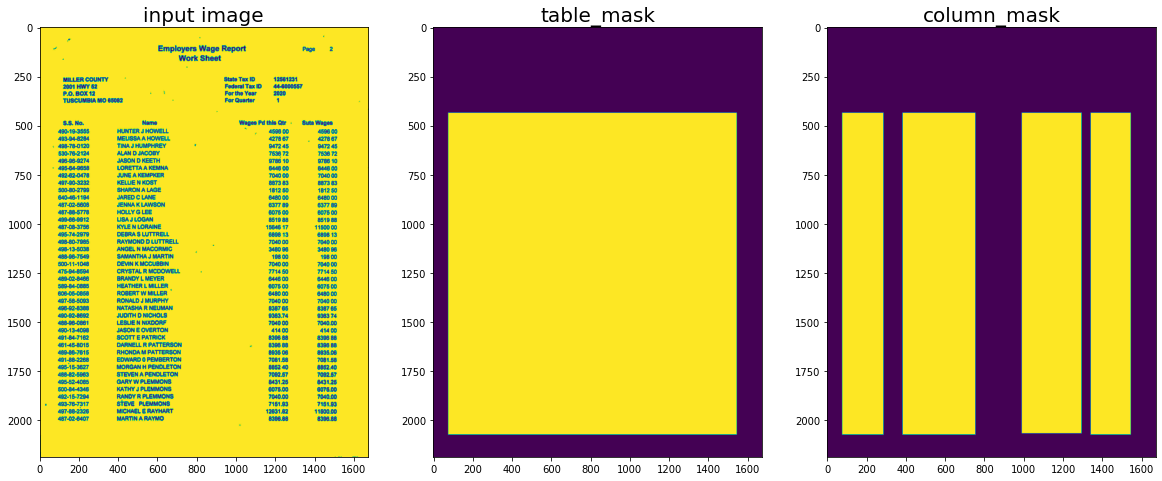

In [97]:
input = '/home/vimal/Documents/mask/overall/input/3p_0812921000.jpeg'
table_mask = '/home/vimal/Documents/mask/overall/table_mask/3p_0812921000.jpeg'
column_mask = '/home/vimal/Documents/mask/overall/column_mask/3p_0812921000.jpeg'


im = Image.open(input) 
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
list_ds = tf.data.Dataset.list_files('/home/vimal/Downloads/Marmot/marmot/*.xml')

In [7]:
img_height, img_width = 256, 256

def normalize(input_image):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    return input_image
def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img)
    # resize the image to the desired size
    return tf.image.resize(img, [img_height, img_width])
def decode_mask_img(img):
    # convert the compressed string to a 2D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=1)
    # resize the image to the desired size
    return tf.image.resize(img, [img_height, img_width])
def process_path(file_path):
    file_path = tf.strings.regex_replace(file_path, '.xml', '.jpeg')
    #mask_file_path = tf.strings.regex_replace(file_path, '.jpg', '.jpeg')
    table_mask_file_path = tf.strings.regex_replace(file_path,'marmot', 'table_mask')
    column_mask_file_path = tf.strings.regex_replace(file_path,'marmot', 'column_mask')
    img = normalize(decode_img(tf.io.read_file(file_path)))
    table_mask = normalize(decode_mask_img(tf.io.read_file(table_mask_file_path)))
    column_mask = normalize(decode_mask_img(tf.io.read_file(column_mask_file_path)))
    return img, {"table_output" : table_mask, "column_output" : column_mask }

In [8]:
DATASET_SIZE = len(list(list_ds))
train_size = int(0.9 * DATASET_SIZE)
test_size = int(0.1 * DATASET_SIZE)
train = list_ds.take(train_size)
test = list_ds.skip(train_size)
TRAIN_LENGTH = len(list(train))
BATCH_SIZE = 2
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
train = train.shuffle(BUFFER_SIZE)
train = train.map(process_path,
num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = test.map(process_path)
train_dataset = train.batch(BATCH_SIZE).repeat().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

In [9]:
def display(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'Table Mask', 'Column Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

(256, 256, 1)


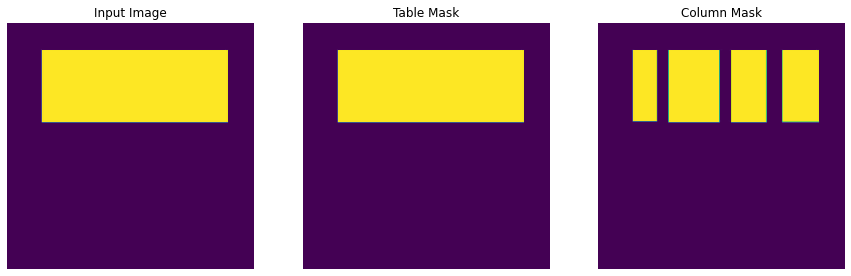

(256, 256, 1)


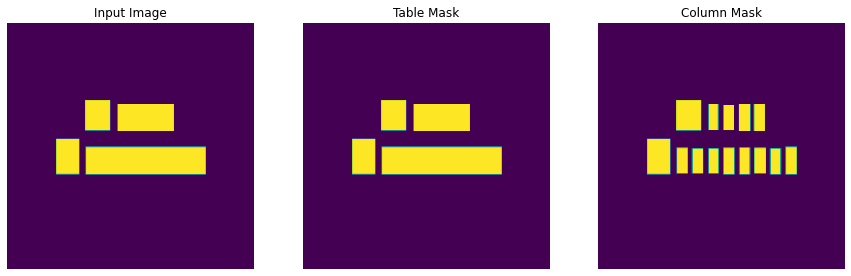

In [13]:
for image, mask in train.take(2):
    print(image.shape)
    # print(mask.shape)
    display([image, mask['table_output'], mask['column_output']])

In [1]:
pip install BatchNormalization

ERROR: Could not find a version that satisfies the requirement BatchNormalization
ERROR: No matching distribution found for BatchNormalization
Note: you may need to restart the kernel to use updated packages.
